<font size="+3" color='#053c96'><b>Import Libraries</b></font>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso,Ridge

: 

In [ ]:
# pip install xgboost

<font size="+3" color='#053c96'><b>Import Data</b></font>

In [ ]:
# import zipfile
# df = pd.read_csv('./notebooks/data/laptop-selection-dataset.zip', compression='zip')

df = pd.read_csv('./data/laptops.csv')
# Print the dataframe
df.head()

,Unnamed: 0,img_link,name,price(in Rs.),processor,ram,os,storage,display(in inch),rating,no_of_ratings,no_of_reviews
0,0,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Intel Core i5 11th Gen,62990,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.5,14.0,1.0
1,1,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo V15 G2 Core i3 11th Gen,37500,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB HDD|256 GB SSD,15.6,4.4,53.0,3.0
2,2,https://rukminim1.flixcart.com/image/312/312/l...,ASUS TUF Gaming F15 Core i5 10th Gen,49990,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.4,4733.0,463.0
3,3,https://rukminim1.flixcart.com/image/312/312/x...,ASUS VivoBook 15 (2022) Core i3 10th Gen,33990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,15.6,4.3,10406.0,1040.0
4,4,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Athlon Dual Core,18990,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,DOS Operating System,256 GB SSD,14.0,3.8,18.0,3.0


<font size="+3" color='#053c96'><b>Data Information</b></font>

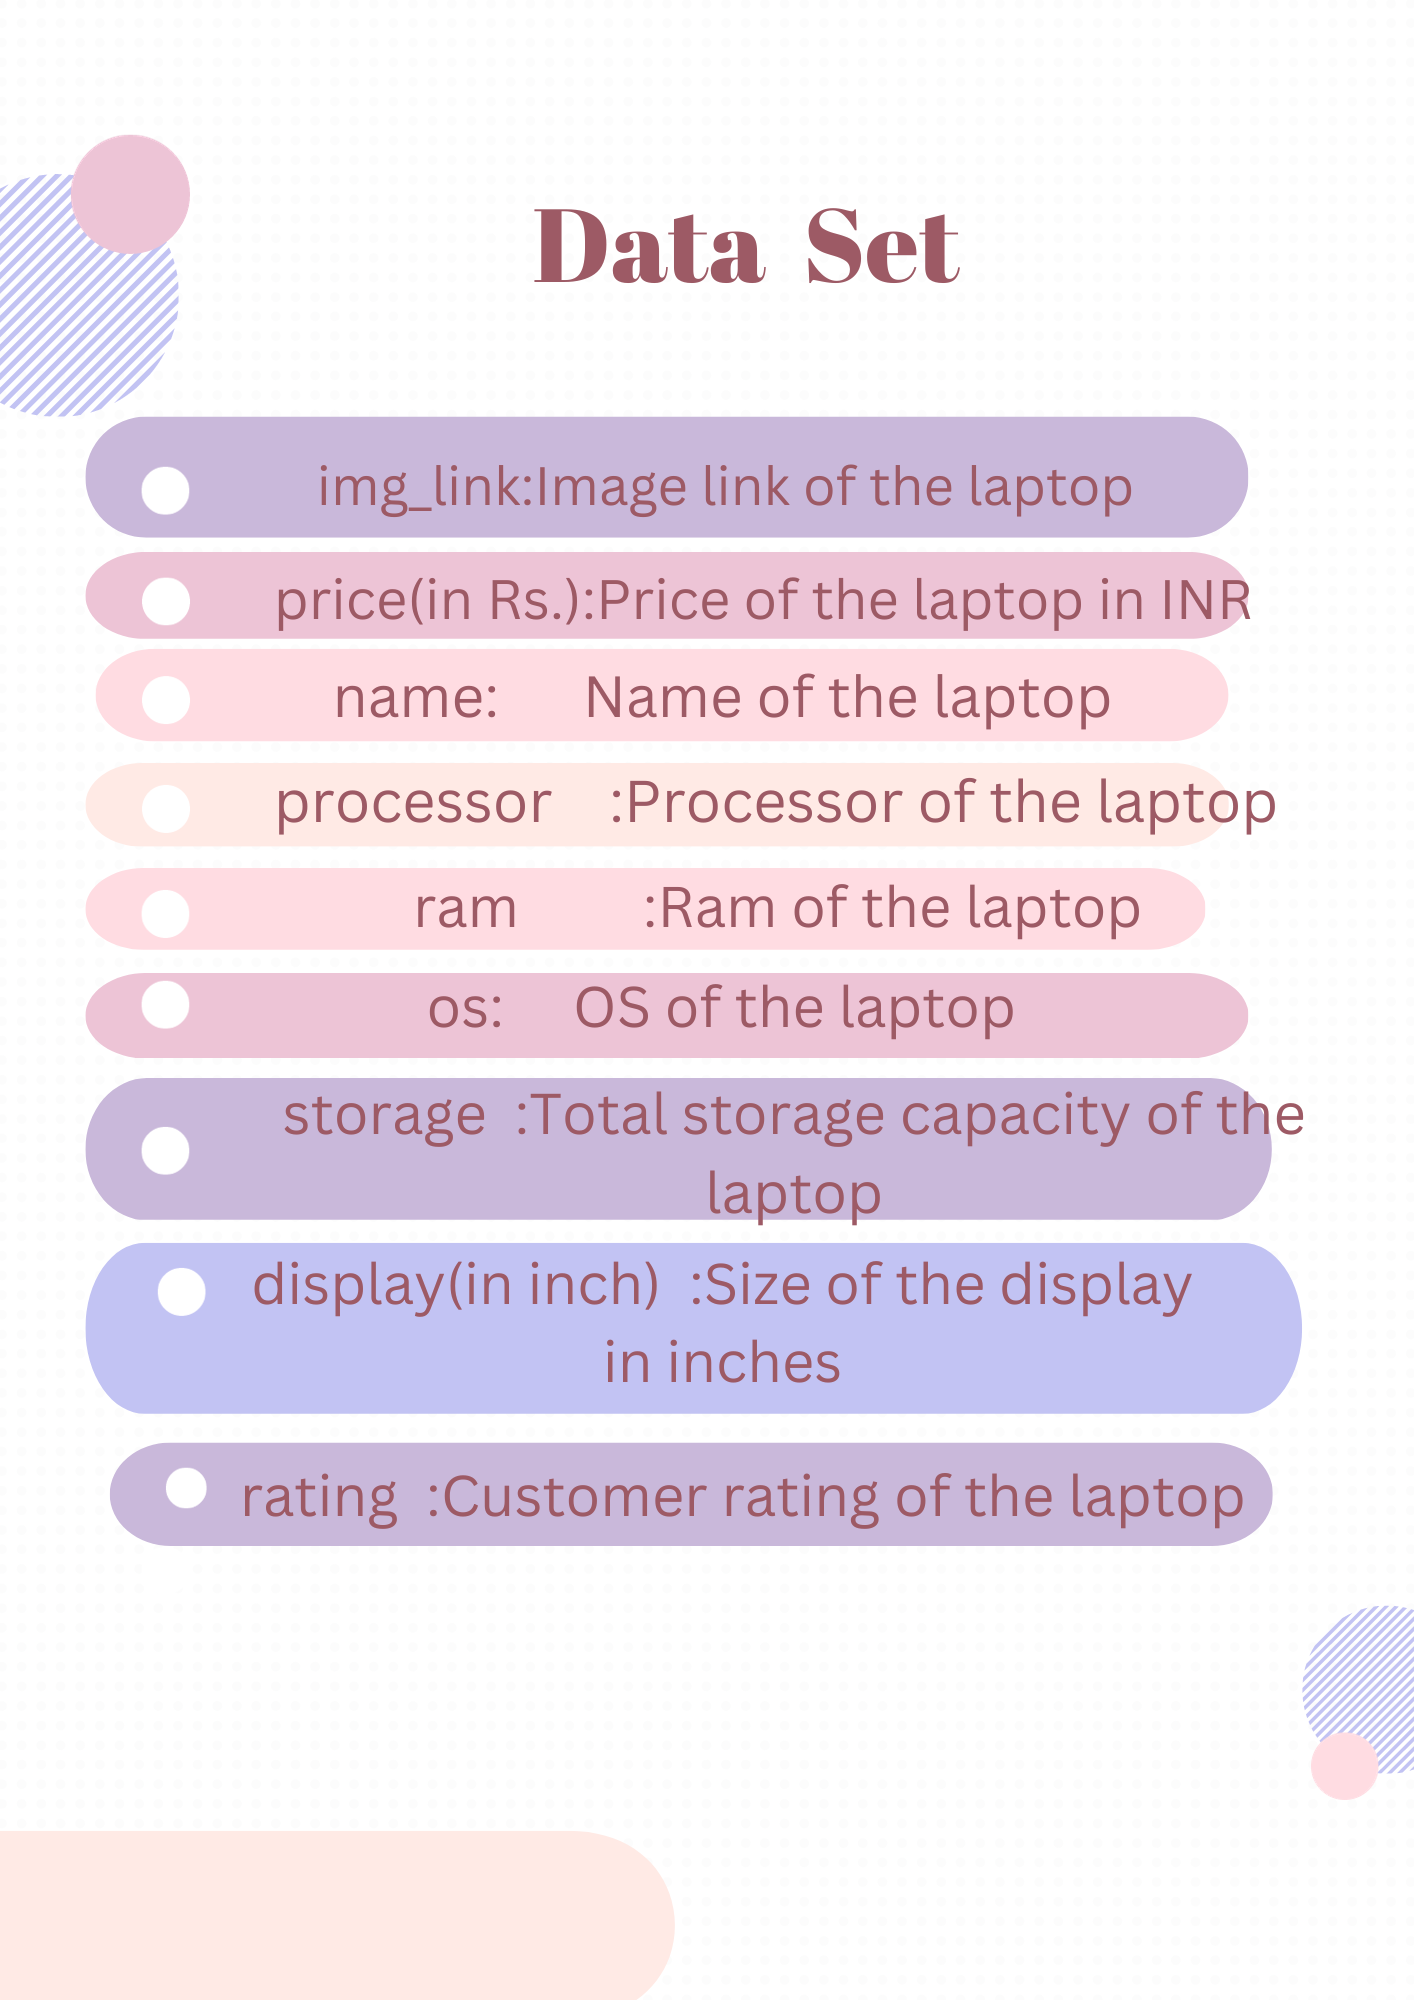

In [ ]:
df.head()

,Unnamed: 0,img_link,name,price(in Rs.),processor,ram,os,storage,display(in inch),rating,no_of_ratings,no_of_reviews
0,0,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Intel Core i5 11th Gen,62990,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.5,14.0,1.0
1,1,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo V15 G2 Core i3 11th Gen,37500,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB HDD|256 GB SSD,15.6,4.4,53.0,3.0
2,2,https://rukminim1.flixcart.com/image/312/312/l...,ASUS TUF Gaming F15 Core i5 10th Gen,49990,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.4,4733.0,463.0
3,3,https://rukminim1.flixcart.com/image/312/312/x...,ASUS VivoBook 15 (2022) Core i3 10th Gen,33990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,15.6,4.3,10406.0,1040.0
4,4,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Athlon Dual Core,18990,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,DOS Operating System,256 GB SSD,14.0,3.8,18.0,3.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'img_link', 'name', 'price(in Rs.)', 'processor', 'ram',
       'os', 'storage', 'display(in inch)', 'rating', 'no_of_ratings',
       'no_of_reviews'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        984 non-null    int64  
 1   img_link          984 non-null    object 
 2   name              984 non-null    object 
 3   price(in Rs.)     984 non-null    int64  
 4   processor         984 non-null    object 
 5   ram               984 non-null    object 
 6   os                984 non-null    object 
 7   storage           984 non-null    object 
 8   display(in inch)  984 non-null    float64
 9   rating            688 non-null    float64
 10  no_of_ratings     688 non-null    float64
 11  no_of_reviews     688 non-null    float64
dtypes: float64(4), int64(2), object(6)
memory usage: 92.4+ KB


In [ ]:
df.describe()

,Unnamed: 0,price(in Rs.),display(in inch),rating,no_of_ratings,no_of_reviews
count,984.000000,984.000000,984.000000,688.000000,688.000000,688.000000
mean,491.500000,80960.720528,15.148374,4.284884,718.091570,83.898256
std,284.200633,57421.220919,1.332078,0.330239,1750.817825,211.596726
min,0.000000,15990.000000,11.600000,1.600000,1.000000,0.000000
25%,245.750000,42655.000000,14.000000,4.100000,14.000000,2.000000
50%,491.500000,62990.000000,15.600000,4.300000,90.000000,11.000000
75%,737.250000,94990.000000,15.600000,4.500000,453.000000,53.500000
max,983.000000,419990.000000,35.000000,5.000000,15492.000000,2054.000000


In [ ]:
df.dtypes

Unnamed: 0            int64
img_link             object
name                 object
price(in Rs.)         int64
processor            object
ram                  object
os                   object
storage              object
display(in inch)    float64
rating              float64
no_of_ratings       float64
no_of_reviews       float64
dtype: object

In [ ]:
df.isna().sum()

Unnamed: 0            0
img_link              0
name                  0
price(in Rs.)         0
processor             0
ram                   0
os                    0
storage               0
display(in inch)      0
rating              296
no_of_ratings       296
no_of_reviews       296
dtype: int64

<font size="+3" color='#053c96'><b>EDA</b></font>

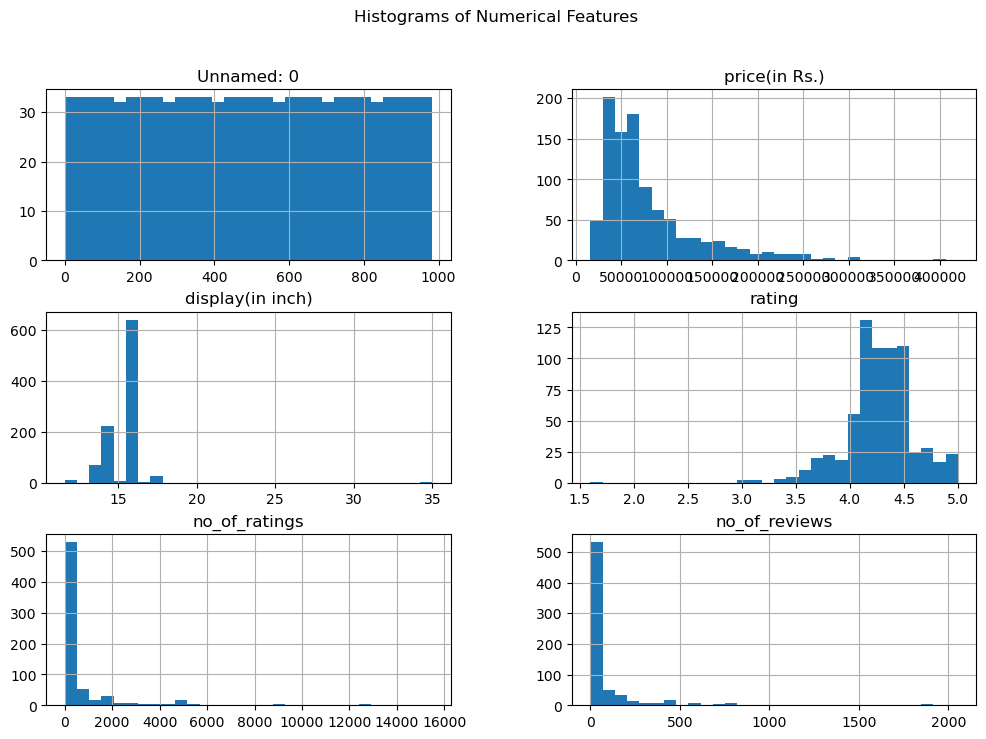

In [ ]:
df.hist(figsize=(12, 8), bins=30)
plt.suptitle('Histograms of Numerical Features')
plt.show()

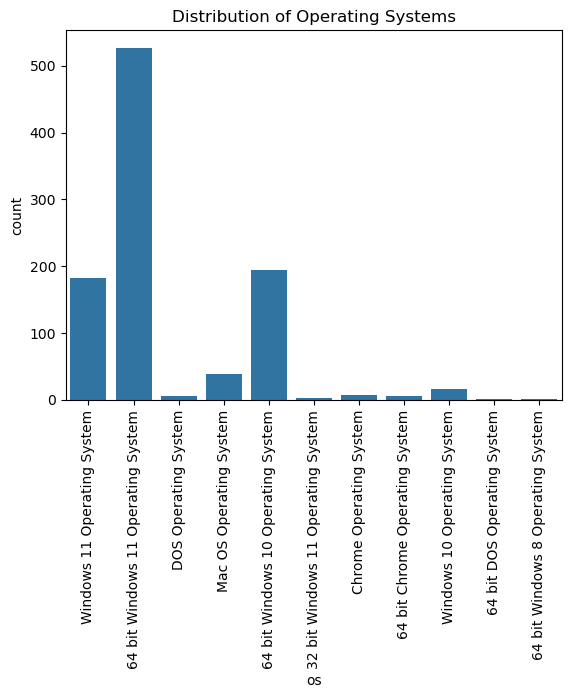

In [ ]:
# Explore categorical features
sns.countplot(x='os', data=df)
plt.title('Distribution of Operating Systems')
plt.xticks(rotation='vertical')
plt.show()

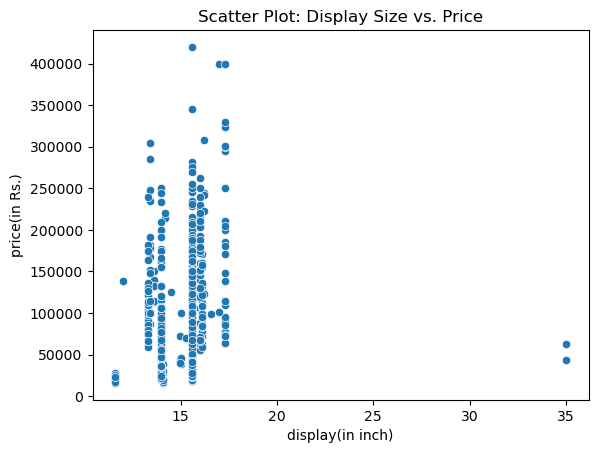

In [ ]:
# Scatter plot of two numerical features
sns.scatterplot(x='display(in inch)', y='price(in Rs.)', data=df)
plt.title('Scatter Plot: Display Size vs. Price')
plt.show()

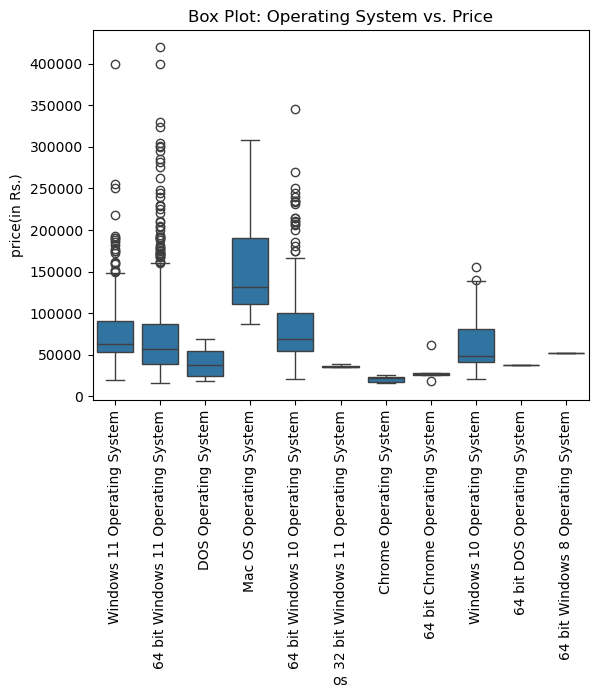

In [ ]:
# Box plot for categorical vs. numerical feature
sns.boxplot(x='os', y='price(in Rs.)', data=df)
plt.title('Box Plot: Operating System vs. Price')
plt.xticks(rotation='vertical')
plt.show()


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


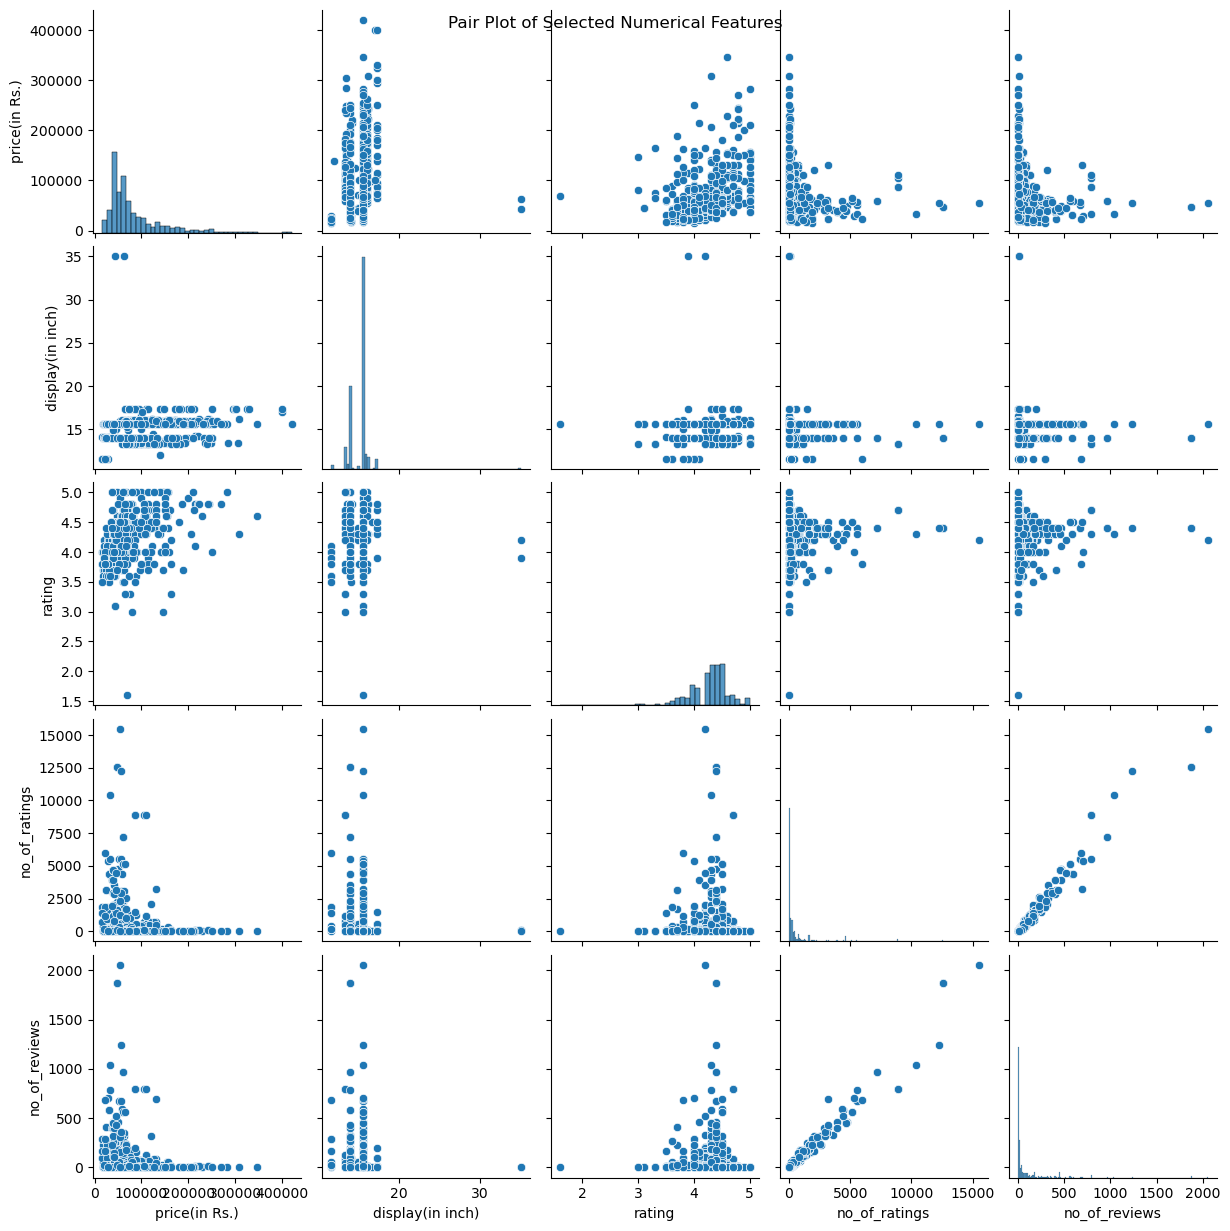

In [ ]:
# Pairplot for selected numerical features
sns.pairplot(df[['price(in Rs.)', 'display(in inch)', 'rating', 'no_of_ratings', 'no_of_reviews']])
plt.suptitle('Pair Plot of Selected Numerical Features')
plt.show()

<font size="+3" color='#053c96'><b>Data Processing</b></font>

<Axes: ylabel='price(in Rs.)'>

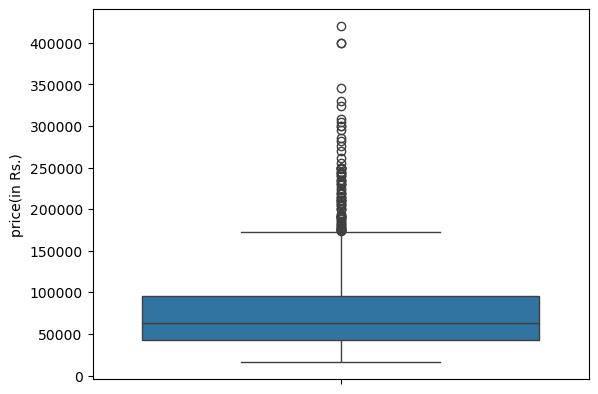

In [ ]:
sns.boxplot(df['price(in Rs.)'])

In [ ]:
upper=round(df['price(in Rs.)'].quantile(.99))




In [ ]:
df[df['price(in Rs.)']>upper].shape

(10, 12)

In [ ]:
df=df[df['price(in Rs.)']<upper]

In [ ]:
df.shape


(974, 12)

In [ ]:
df.head()

,Unnamed: 0,img_link,name,price(in Rs.),processor,ram,os,storage,display(in inch),rating,no_of_ratings,no_of_reviews
0,0,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Intel Core i5 11th Gen,62990,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.5,14.0,1.0
1,1,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo V15 G2 Core i3 11th Gen,37500,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB HDD|256 GB SSD,15.6,4.4,53.0,3.0
2,2,https://rukminim1.flixcart.com/image/312/312/l...,ASUS TUF Gaming F15 Core i5 10th Gen,49990,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.4,4733.0,463.0
3,3,https://rukminim1.flixcart.com/image/312/312/x...,ASUS VivoBook 15 (2022) Core i3 10th Gen,33990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,15.6,4.3,10406.0,1040.0
4,4,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Athlon Dual Core,18990,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,DOS Operating System,256 GB SSD,14.0,3.8,18.0,3.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'img_link', 'name', 'price(in Rs.)', 'processor', 'ram',
       'os', 'storage', 'display(in inch)', 'rating', 'no_of_ratings',
       'no_of_reviews'],
      dtype='object')

In [ ]:
df.drop(['Unnamed: 0','img_link','rating','no_of_ratings','no_of_reviews','name',],axis=1,inplace=True)

In [ ]:
df.to_csv("./data/dataset.csv")

In [ ]:
train=df[:786]
test=df[787:]

In [ ]:
train.to_csv("./artifacts/train.csv",index=False)
train.to_csv("./artifacts/test.csv",index=False)

In [ ]:

processor_lis=df['processor'].unique().tolist()
ram_lis=df['ram'].unique().tolist()
os_lis=df['os'].unique().tolist()
storage_lis=df['storage'].unique().tolist()
display_lis=df['display(in inch)'].unique().tolist()

In [ ]:
import json
columns = {
    
    'data_processor' : [x for x in processor_lis],
    'data_ram' : [x for x in ram_lis],
    'data_os' : [x for x in os_lis],
    'data_storage' : [x for x in storage_lis],
    'data_display' : [x for x in display_lis],

}
with open("./artifacts/columns.json","w") as f:
    f.write(json.dumps(columns))

In [ ]:
df1=df.copy()

In [ ]:
df1.columns

Index(['price(in Rs.)', 'processor', 'ram', 'os', 'storage',
       'display(in inch)'],
      dtype='object')

In [ ]:
df1.dtypes

price(in Rs.)         int64
processor            object
ram                  object
os                   object
storage              object
display(in inch)    float64
dtype: object

In [ ]:
# X=df1[['processor', 'ram', 'os', 'storage','display(in inch)']]
# y=df1['price(in Rs.)'].values
# ohe=OneHotEncoder(drop='first')
# cols=['processor', 'ram', 'os', 'storage','display(in inch)']
# one_encoded=ohe.fit_transform(X[cols]).toarray()
# columns = ohe.get_feature_names_out(cols)
# df_one_encoded=pd.DataFrame(one_encoded,columns=columns)
# X=pd.concat([X,df_one_encoded],axis=1)
# X.drop(cols,axis=1,inplace=True)
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)
# from sklearn.preprocessing import StandardScaler
# scalar=StandardScaler()
# X_train=scalar.fit_transform(X_train)
# X_test=scalar.transform(X_test)
# from sklearn.decomposition import PCA
# pca=PCA()
# X_train=pca.fit_transform(X_train)
# X_test=pca.transform(X_test)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Split the data

X = df1[['processor', 'ram', 'os', 'storage', 'display(in inch)']]
y = df1['price(in Rs.)'].values

# # Define categorical and numerical columns
categorical_cols = ['processor', 'ram', 'os', 'storage']
numerical_cols = ['display(in inch)']

# Define transformations
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA())
])

# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ]
)

# Create the full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])



# Fit and transform the training data
X_processed = pipeline.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)





In [ ]:
X_train

<779x101 sparse matrix of type '<class 'numpy.float64'>'
	with 3861 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy').mean()

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\__init__.py", line 423, in _get_column_indices
    all_columns = X.columns
                  ^^^^^^^^^
AttributeError: 'csr_matrix' object has no attribute 'columns'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\compose\_column_transformer.py", line 717, in fit
    self.fit_transform(X, y=y)
  File "C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\_set_output.py", line 157, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\compose\_column_transformer.py", line 751, in fit_transform
    self._validate_column_callables(X)
  File "C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\compose\_column_transformer.py", line 459, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\__init__.py", line 425, in _get_column_indices
    raise ValueError(
ValueError: Specifying the columns using strings is only supported for pandas DataFrames


<font size="+3" color='#053c96'><b>Modelling</b></font>

In [ ]:
# poly_regs= PolynomialFeatures(degree= 2) 
# X_trainpoly=poly_regs.fit_transform(X_train)
# X_testpoly=poly_regs.transform(X_test)


In [ ]:
# model1=LinearRegression()
# model1.fit(X_trainpoly,y_train)
# y_pred1=model1.predict(X_testpoly)
# r2_score(y_test,y_pred1)

In [ ]:
# model_lr=LinearRegression()
# model_lr.fit(X_train,y_train)
# y_pred_lr=model_lr.predict(X_test)
# r2_score(y_test,y_pred_lr)

In [ ]:
model_DT=DecisionTreeRegressor(max_depth=5)
model_DT.fit(X_train,y_train)
y_pred_DT=model_DT.predict(X_test)
r2_score(y_test,y_pred_DT)

0.6556131173844801

In [ ]:
model_rf=RandomForestRegressor(max_depth=4)
model_rf.fit(X_train,y_train)
y_pred_rf=model_rf.predict(X_test)
r2_score(y_test,y_pred_rf)

KeyboardInterrupt: 

In [ ]:
model_xg=XGBRegressor()
model_xg.fit(X_train,y_train)
y_pred_xg=model_xg.predict(X_test)
r2_score(y_test,y_pred_xg)


: 

In [ ]:
# model_svr=SVR(kernel='sigmoid')
# model_svr.fit(X_train,y_train)
# y_pred_svr=model_svr.predict(X_test)
# r2_score(y_test,y_pred_svr)

: 

In [ ]:
model_ad=AdaBoostRegressor()
model_ad.fit(X_train,y_train)
y_pred_ad=model_ad.predict(X_test)
r2_score(y_test,y_pred_ad)

: 

In [ ]:
model_gb=GradientBoostingRegressor()
model_gb.fit(X_train,y_train)
y_pred_gb=model_gb.predict(X_test)
r2_score(y_test,y_pred_gb)

: 

In [ ]:
model_Ls=Lasso()
model_Ls.fit(X_train,y_train)
y_pred_Ls=model_Ls.predict(X_test)
r2_score(y_test,y_pred_Ls)

: 

In [ ]:
model_rdg=Ridge()
model_rdg.fit(X_train,y_train)
y_pred_rdg=model_rdg.predict(X_test)
r2_score(y_test,y_pred_rdg)

: 

<font size="+3" color='#053c96'><b>Tuning</b></font>

In [ ]:
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

: 

In [ ]:
# rand_search=RandomizedSearchCV(model_gb,param_distributions=param_dist,cv=4)

: 

In [ ]:
# rand_search.fit(X_train,y_train)

: 

In [ ]:
# rand_search.best_params_

: 

In [ ]:
model_finalxgb=XGBRegressor(subsample = 1.0,n_estimators = 300,min_samples_split =5,min_samples_leaf =1,max_depth =3,learning_rate =.1)
model_finalxgb.fit(X_train,y_train)
y_pred_fgb=model_finalxgb.predict(X_test)
r2_score(y_test,y_pred_fgb)


: 

In [ ]:
import pickle
with open('./artifacts/LapTopPrice.pickle','wb') as f:
    pickle.dump(model_finalxgb,f)

: 

# Additional Work below

<font size="+3" color='#053c96'><b>Predicting LaptopName</b></font>

In [ ]:
# df_clfn=df_C.copy()

: 

In [ ]:
# df_clfn.head()

: 

In [ ]:
# df_clfn.drop(['Unnamed: 0','img_link','rating','no_of_ratings','no_of_reviews'],axis=1,inplace=True)

: 

In [ ]:
# df_clfn

: 

In [ ]:
# df_clfn.name.value_counts()

: 

In [ ]:
# df_clfn.name.nunique()

: 

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# leC=LabelEncoder()
# df_clfn['name']=leC.fit_transform(df_clfn['name'])


: 

In [ ]:
# Xc=df_clfn[['processor', 'ram', 'os', 'storage','display(in inch)','price(in Rs.)']]
# yc=df_clfn['name'].values

: 

In [ ]:

# oheC=OneHotEncoder(drop='first')
# colsC=['processor', 'ram', 'os', 'storage','display(in inch)']
# one_encodedC=oheC.fit_transform(Xc[colsC]).toarray()
# columnsC = oheC.get_feature_names_out(colsC)
# df_one_encodedC=pd.DataFrame(one_encodedC,columns=columnsC)

: 

In [ ]:
# XC=pd.concat([Xc,df_one_encodedC],axis=1)
# XC.drop(colsC,axis=1,inplace=True)

: 

In [ ]:
# X_trainC,X_testC,y_trainC,y_testC=train_test_split(XC,yc,test_size=.2)

: 

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scalarC=StandardScaler()

: 

In [ ]:
# X_trainC=scalarC.fit_transform(X_trainC)
# X_testC=scalarC.transform(X_testC)
# from sklearn.decomposition import PCA
# pcaC=PCA()

: 

In [ ]:
# X_trainC=pcaC.fit_transform(X_trainC)
# X_testC=pcaC.transform(X_testC)

: 

<font size="+3" color='#053c96'><b>Modelling</b></font>

In [ ]:
# from sklearn.metrics import accuracy_score

: 

In [ ]:
# y_testC

: 

In [ ]:
# len(y_trainC)

: 

In [ ]:
# import numpy as np
# from sklearn.neighbors import KNeighborsRegressor
# ridgC=KNeighborsRegressor()
# ridgC.fit(X_trainC,y_trainC)
# y_pred_rdgC=ridgC.predict(X_testC)
# y_pred_rdgC = np.round(y_pred_rdgC)

# r2_score(y_testC,y_pred_rdgC)

: 

In [ ]:
# import numpy as np
# from sklearn.naive_bayes import GaussianNB
# ridgC=GaussianNB()
# ridgC.fit(X_trainC,y_trainC)
# y_pred_rdgC=ridgC.predict(X_testC)
# y_pred_rdgC = np.round(y_pred_rdgC)

# r2_score(y_testC,y_pred_rdgC)

: 

In [ ]:
# import numpy as np
# from sklearn.ensemble import RandomForestRegressor
# rfC=RandomForestRegressor()
# rfC.fit(X_trainC,y_trainC)
# y_pred_rfC=rfC.predict(X_testC)
# y_pred_rfC = np.round(y_pred_rfC)

# r2_score(y_testC,y_pred_rdgC)

: 

In [ ]:
# param_dist = {
#     'n_estimators': [50, 100, 200, 300],
    
#     'max_depth': [3, 4, 5, 6],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    
# }

: 

In [ ]:
# rand_searchC=RandomizedSearchCV(rfC,param_distributions=param_dist,cv=4)

: 

In [ ]:
# rand_searchC.fit(X_trainC,y_trainC)

: 

In [ ]:
# rand_searchC.

: 

In [ ]:
# int_values = [int(float(value)) for value in y_pred_rdgC]
# int_values

: 

In [ ]:
# y_testC

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 